# Figure 1: time series

Time series of Nino3.4 variability for all models from 1850-2100.

- detrend using the ensemble mean
- 30-year running variance, averaged over all ensemble members, then sqrt() to convert to standard deviation
- compare to ensemble variance, averaged over 30 years, then sqrt() to convert to standard deviation

## Setup
### load required packages

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

import numpy as np
# from scipy.io import netcdf
# import scipy.stats as stats
import pandas as pd

import xarray as xr
# import random
import os
from pprint import pprint
from tqdm import tqdm

# # Import Cdo-py (only works with custom environment)
# import cdo
# cdo = cdo.Cdo() #
    


## set paths

In [2]:
# directories with processed output
basedir_processed_NINO34 = '/glade/scratch/milinski/ESGF_downloads/NINO34/'

# directory for saving plots
plotdir = './plots/figure_1/'
if not os.path.exists(plotdir):
    os.makedirs(plotdir)
    



## load HadISST

In [3]:
file = basedir_processed_NINO34 + 'n34_HadISST_1981-2020.nc'
hadisst = xr.open_dataset(file)['N34']


## load MIROC6

In [4]:
var = 'tos'
model = 'MIROC6'
experiment = 'historical'
filepath = basedir_processed_NINO34 + 'MIROC6/'+experiment+'/'


file_prefix=var+'_Omon_'+model+'_'+experiment+'_'
file_suffix='_g025_nino34.nc'

# initialise array:
ds = []

for member in tqdm(range(1,51)):
    id = 'r'+str(member)+'i1p1f1'
    file = file_prefix+id+file_suffix
    member = xr.open_dataset(filepath+file).squeeze()
    ds.append(member)


miroc6_historical_nino34 = xr.concat(ds, dim='ensemble')
# miroc6_historical_nino34 = miroc6_historical_nino34[var]
# miroc_historical_nino34[var] = miroc_historical_nino34[var]-273.15 # K to °C

# discard last value because it only contains December 2100 instead of DJF
# cesm_nino34['ts'] = cesm_nino34['ts'].loc[:,:'2100-03-31']

100%|██████████| 50/50 [00:01<00:00, 49.98it/s]


In [5]:
var = 'tos'
model = 'MIROC6'
experiment = 'ssp585'
filepath = basedir_processed_NINO34 + 'MIROC6/'+experiment+'/'


file_prefix=var+'_mon_'+model+'_'+experiment+'_' #check if files are Omon instead of mon if script fails here
file_suffix='_g025_nino34.nc'

# initialise array:
ds = []

for member in tqdm(range(1,51)):
    id = 'r'+str(member)+'i1p1f1'
    file = file_prefix+id+file_suffix
    member = xr.open_dataset(filepath+file).squeeze()
    ds.append(member)


miroc6_ssp585_nino34 = xr.concat(ds, dim='ensemble')
# miroc_historical_nino34[var] = miroc_historical_nino34[var]-273.15 # K to °C

# discard last value because it only contains December 2100 instead of DJF
# cesm_nino34['ts'] = cesm_nino34['ts'].loc[:,:'2100-03-31']

100%|██████████| 50/50 [00:00<00:00, 59.10it/s]


In [6]:
miroc6_nino34 = xr.concat([miroc6_historical_nino34,miroc6_ssp585_nino34],dim='time')[var]

## load CanESM5

In [7]:
var = 'tos'
model = 'CanESM5'
experiment = 'historical'
filepath = basedir_processed_NINO34 + model + '/'+experiment+'/'


file_prefix=var+'_mon_'+model+'_'+experiment+'_'
file_suffix='_g025_nino34.nc'

# initialise array:
ds = []

for member in tqdm(range(1,51)):
    if member<=25:
        id='r'+str(member)+'i1p1f1'
    else:
        id='r'+str(member-25)+'i1p2f1'
    file = file_prefix+id+file_suffix
#     print(file)
    member = xr.open_dataset(filepath+file).squeeze()
    ds.append(member)


canesm5_historical_nino34 = xr.concat(ds, dim='ensemble')
# miroc_historical_nino34[var] = miroc_historical_nino34[var]-273.15 # K to °C

# discard last value because it only contains December 2100 instead of DJF
# cesm_nino34['ts'] = cesm_nino34['ts'].loc[:,:'2100-03-31']

100%|██████████| 50/50 [00:01<00:00, 38.04it/s]


In [8]:
var = 'tos'
model = 'CanESM5'
experiment = 'ssp585'
filepath = basedir_processed_NINO34 + model + '/'+experiment+'/'


file_prefix=var+'_mon_'+model+'_'+experiment+'_'
file_suffix='_g025_nino34.nc'

# initialise array:
ds = []

for member in tqdm(range(1,51)):
    if member<=25:
        id='r'+str(member)+'i1p1f1'
    else:
        id='r'+str(member-25)+'i1p2f1'
    file = file_prefix+id+file_suffix
#     print(file)
    member = xr.open_dataset(filepath+file).squeeze()
    ds.append(member)


canesm5_ssp585_nino34 = xr.concat(ds, dim='ensemble')
# miroc_historical_nino34[var] = miroc_historical_nino34[var]-273.15 # K to °C

# discard last value because it only contains December 2100 instead of DJF
# cesm_nino34['ts'] = cesm_nino34['ts'].loc[:,:'2100-03-31']

100%|██████████| 50/50 [00:01<00:00, 46.01it/s]


In [9]:
canesm5_nino34 = xr.concat([canesm5_historical_nino34,canesm5_ssp585_nino34],dim='time')[var]

## load CESM2-LENS

In [10]:
var = 'sst'
model = 'CESM2-LENS'
experiment = 'BHISTcmip6'
filepath = basedir_processed_NINO34 + model+'/'+experiment+'/'


file_prefix=var+'_mon_'+model+'_'+experiment+'_'
file_suffix='_nino34.nc'

# initialise array:
ds = []

for member in tqdm(range(1,51)):
    id = 'member'+str(member)
    file = file_prefix+id+file_suffix
    member = xr.open_dataset(filepath+file).squeeze()
    ds.append(member)

cesm2_historical_nino34 = xr.concat(ds, dim='ensemble')


100%|██████████| 50/50 [00:02<00:00, 23.83it/s]


In [11]:
# remove the member that is not available for ssp370 from historical so that timeseries can be merged
cesm2_historical_nino34 = cesm2_historical_nino34['SST'][list(np.arange(0,10))+list(np.arange(11,50)),:] 

In [12]:
var = 'sst'
model = 'CESM2-LENS'
experiment = 'BSSP370cmip6'
filepath = basedir_processed_NINO34 + model+'/'+experiment+'/'


file_prefix=var+'_mon_'+model+'_'+experiment+'_'
file_suffix='_nino34.nc'

# initialise array:
ds = []

for member in tqdm(list(np.arange(1,11))+list(np.arange(12,51))):
    id = 'member'+str(member)
    file = file_prefix+id+file_suffix
    member = xr.open_dataset(filepath+file).SST.squeeze()
    ds.append(member)
#     print(len(member['time']))
#

cesm2_ssp370_nino34 = xr.concat(ds, dim='ensemble')


100%|██████████| 49/49 [00:00<00:00, 50.58it/s]


In [13]:
cesm2_nino34 = xr.concat([cesm2_historical_nino34,cesm2_ssp370_nino34],dim='time')
cesm2_nino34 = cesm2_nino34-273.15 # K to °C

In [14]:
# time axis in CESM is shifted by 1 month. Use CanESM5 time series instead (easier than shifting)
cesm2_nino34['time'] = canesm5_nino34['time']

## load IPSL-CM6A-LR

In [15]:
var = 'tos'
model = 'IPSL-CM6A-LR'
experiment = 'historical'
filepath = basedir_processed_NINO34 + model +'/'+experiment+'/'


file_prefix=var+'_mon_'+model+'_'+experiment+'_'
file_suffix='_g025_nino34.nc'

# initialise array:
ds = []

for member in tqdm(range(1,12)):
    id = 'r'+str(member)+'i1p1f1'
    file = file_prefix+id+file_suffix
    member = xr.open_dataset(filepath+file).squeeze()
    ds.append(member)


ipsl_historical_nino34 = xr.concat(ds, dim='ensemble')
# miroc6_historical_nino34 = miroc6_historical_nino34[var]
# miroc_historical_nino34[var] = miroc_historical_nino34[var]-273.15 # K to °C

# discard last value because it only contains December 2100 instead of DJF
# cesm_nino34['ts'] = cesm_nino34['ts'].loc[:,:'2100-03-31']

100%|██████████| 11/11 [00:00<00:00, 45.41it/s]


In [16]:
var = 'tos'
model = 'IPSL-CM6A-LR'
experiment = 'ssp370'
filepath = basedir_processed_NINO34 + model + '/'+experiment+'/'


file_prefix=var+'_mon_'+model+'_'+experiment+'_' #check if files are Omon instead of mon if script fails here
file_suffix='_g025_nino34.nc'

# initialise array:
ds = []

for member in tqdm(range(1,12)):
    id = 'r'+str(member)+'i1p1f1'
    file = file_prefix+id+file_suffix
    member = xr.open_dataset(filepath+file).squeeze()
    ds.append(member)


ipsl_ssp370_nino34 = xr.concat(ds, dim='ensemble')
# miroc_historical_nino34[var] = miroc_historical_nino34[var]-273.15 # K to °C

# discard last value because it only contains December 2100 instead of DJF
# cesm_nino34['ts'] = cesm_nino34['ts'].loc[:,:'2100-03-31']

100%|██████████| 11/11 [00:00<00:00, 45.40it/s]


In [17]:
ipsl_nino34 = xr.concat([ipsl_historical_nino34,ipsl_ssp370_nino34],dim='time')[var]

## load CNRM-CM6-1

In [19]:
var = 'tos'
model = 'CNRM-CM6-1'
experiment = 'historical'
filepath = basedir_processed_NINO34 + model +'/'+experiment+'/'


file_prefix=var+'_mon_'+model+'_'+experiment+'_'
file_suffix='_g025_nino34.nc'

# initialise array:
ds = []

for member in tqdm(range(1,7)):
    id = 'r'+str(member)+'i1p1f2'
    file = file_prefix+id+file_suffix
    member = xr.open_dataset(filepath+file).squeeze()
    ds.append(member)


cnrm_historical_nino34 = xr.concat(ds, dim='ensemble')
# miroc6_historical_nino34 = miroc6_historical_nino34[var]
# miroc_historical_nino34[var] = miroc_historical_nino34[var]-273.15 # K to °C

# discard last value because it only contains December 2100 instead of DJF
# cesm_nino34['ts'] = cesm_nino34['ts'].loc[:,:'2100-03-31']

100%|██████████| 6/6 [00:00<00:00, 154.22it/s]


In [20]:
var = 'tos'
model = 'CNRM-CM6-1'
experiment = 'ssp370'
filepath = basedir_processed_NINO34 + model + '/'+experiment+'/'


file_prefix=var+'_mon_'+model+'_'+experiment+'_' #check if files are Omon instead of mon if script fails here
file_suffix='_g025_nino34.nc'

# initialise array:
ds = []

for member in tqdm(range(1,7)):
    id = 'r'+str(member)+'i1p1f2'
    file = file_prefix+id+file_suffix
    member = xr.open_dataset(filepath+file).squeeze()
    ds.append(member)


cnrm_ssp370_nino34 = xr.concat(ds, dim='ensemble')
# miroc_historical_nino34[var] = miroc_historical_nino34[var]-273.15 # K to °C

# discard last value because it only contains December 2100 instead of DJF
# cesm_nino34['ts'] = cesm_nino34['ts'].loc[:,:'2100-03-31']

100%|██████████| 6/6 [00:00<00:00, 45.79it/s]


In [22]:
cnrm_nino34 = xr.concat([cnrm_historical_nino34,cnrm_ssp370_nino34],dim='time')[var]

## load ACCESS-ESM1-5

## load ACCESS-ESM1-5

In [23]:
var = 'tos'
model = 'ACCESS-ESM1-5'
experiment = 'historical'
filepath = basedir_processed_NINO34 + model +'/'+experiment+'/'


file_prefix=var+'_mon_'+model+'_'+experiment+'_'
file_suffix='_g025_nino34.nc'

# initialise array:
ds = []

for member in tqdm(range(1,11)): # has 30 historical members
    id = 'r'+str(member)+'i1p1f1'
    file = file_prefix+id+file_suffix
    member = xr.open_dataset(filepath+file).squeeze()
    ds.append(member)


access_historical_nino34 = xr.concat(ds, dim='ensemble')
# miroc6_historical_nino34 = miroc6_historical_nino34[var]
# miroc_historical_nino34[var] = miroc_historical_nino34[var]-273.15 # K to °C

# discard last value because it only contains December 2100 instead of DJF
# cesm_nino34['ts'] = cesm_nino34['ts'].loc[:,:'2100-03-31']

100%|██████████| 10/10 [00:00<00:00, 43.75it/s]


In [24]:
var = 'tos'
model = 'ACCESS-ESM1-5'
experiment = 'ssp585'
filepath = basedir_processed_NINO34 + model + '/'+experiment+'/'


file_prefix=var+'_mon_'+model+'_'+experiment+'_' #check if files are Omon instead of mon if script fails here
file_suffix='_g025_nino34.nc'

# initialise array:
ds = []

for member in tqdm(range(1,11)):
    id = 'r'+str(member)+'i1p1f1'
    file = file_prefix+id+file_suffix
    member = xr.open_dataset(filepath+file).squeeze()
    ds.append(member)


access_ssp370_nino34 = xr.concat(ds, dim='ensemble')
# miroc_historical_nino34[var] = miroc_historical_nino34[var]-273.15 # K to °C

# discard last value because it only contains December 2100 instead of DJF
# cesm_nino34['ts'] = cesm_nino34['ts'].loc[:,:'2100-03-31']

100%|██████████| 10/10 [00:00<00:00, 50.64it/s]


In [25]:
access_nino34 = xr.concat([access_historical_nino34,access_ssp370_nino34],dim='time')[var]

## load EC-Earth3
Focus on members 101-150 because they are available for historical + ssp585.

In [26]:
var = 'tos'
model = 'EC-Earth3'
experiment = 'historical'
filepath = basedir_processed_NINO34 + model +'/'+experiment+'/'


file_prefix=var+'_mon_'+model+'_'+experiment+'_'
file_suffix='_g025_nino34.nc'

# initialise array:
ds = []

for member in tqdm(range(101,151)): # has 30 historical members
    id = 'r'+str(member)+'i1p1f1'
    file = file_prefix+id+file_suffix
    member = xr.open_dataset(filepath+file).squeeze()
    ds.append(member)


ecearth3_historical_nino34 = xr.concat(ds, dim='ensemble')
# miroc6_historical_nino34 = miroc6_historical_nino34[var]
# miroc_historical_nino34[var] = miroc_historical_nino34[var]-273.15 # K to °C

# discard last value because it only contains December 2100 instead of DJF
# cesm_nino34['ts'] = cesm_nino34['ts'].loc[:,:'2100-03-31']

100%|██████████| 50/50 [00:00<00:00, 81.52it/s]


In [27]:
var = 'tos'
model = 'EC-Earth3'
experiment = 'ssp585'
filepath = basedir_processed_NINO34 + model + '/'+experiment+'/'


file_prefix=var+'_mon_'+model+'_'+experiment+'_' #check if files are Omon instead of mon if script fails here
file_suffix='_g025_nino34.nc'

# initialise array:
ds = []

for member in tqdm(range(101,151)):
    id = 'r'+str(member)+'i1p1f1'
    file = file_prefix+id+file_suffix
    member = xr.open_dataset(filepath+file).squeeze()
    ds.append(member)


ecearth3_ssp585_nino34 = xr.concat(ds, dim='ensemble')
# miroc_historical_nino34[var] = miroc_historical_nino34[var]-273.15 # K to °C

# discard last value because it only contains December 2100 instead of DJF
# cesm_nino34['ts'] = cesm_nino34['ts'].loc[:,:'2100-03-31']

100%|██████████| 50/50 [00:00<00:00, 81.19it/s] 


In [28]:
ecearth3_historical_nino34 = ecearth3_historical_nino34.tos
ecearth3_ssp585_nino34 = ecearth3_ssp585_nino34.tos

In [29]:
ecearth3_nino34 = xr.concat([ecearth3_historical_nino34,ecearth3_ssp585_nino34],dim='time')

## load MIROC-ES2L

In [30]:
var = 'tos'
model = 'MIROC-ES2L'
experiment = 'historical'
filepath = basedir_processed_NINO34 + model +'/'+experiment+'/'


file_prefix=var+'_mon_'+model+'_'+experiment+'_'
file_suffix='_g025_nino34.nc'

# initialise array:
ds = []

for member in tqdm(range(1,11)): # has 30 historical members
    id = 'r'+str(member)+'i1p1f2'
    file = file_prefix+id+file_suffix
    member = xr.open_dataset(filepath+file).squeeze()
    ds.append(member)


miroc_e2sl_historical_nino34 = xr.concat(ds, dim='ensemble')
# miroc6_historical_nino34 = miroc6_historical_nino34[var]
# miroc_historical_nino34[var] = miroc_historical_nino34[var]-273.15 # K to °C

# discard last value because it only contains December 2100 instead of DJF
# cesm_nino34['ts'] = cesm_nino34['ts'].loc[:,:'2100-03-31']

100%|██████████| 10/10 [00:00<00:00, 54.29it/s]


In [31]:
var = 'tos'
model = 'MIROC-ES2L'
experiment = 'ssp585'
filepath = basedir_processed_NINO34 + model + '/'+experiment+'/'


file_prefix=var+'_mon_'+model+'_'+experiment+'_' #check if files are Omon instead of mon if script fails here
file_suffix='_g025_nino34.nc'

# initialise array:
ds = []

for member in tqdm(range(1,11)):
    id = 'r'+str(member)+'i1p1f2'
    file = file_prefix+id+file_suffix
    member = xr.open_dataset(filepath+file).squeeze()
    ds.append(member)


miroc_e2sl_ssp370_nino34 = xr.concat(ds, dim='ensemble')


100%|██████████| 10/10 [00:00<00:00, 41.04it/s]


In [32]:
miroc_e2sl_nino34 = xr.concat([miroc_e2sl_historical_nino34,miroc_e2sl_ssp370_nino34],dim='time')[var]

## compute DJF statistics

In [71]:
canesm5_nino34_DJF = canesm5_nino34[:,11:].resample(time="QS-DEC").sum()[:,0::4][:,0:-1]/3
miroc6_nino34_DJF = miroc6_nino34[:,11:].resample(time="QS-DEC").sum()[:,0::4][:,0:-1]/3
cesm2_nino34_DJF = cesm2_nino34[:,11:].resample(time="QS-DEC").sum()[:,0::4][:,0:-1]/3
ipsl_nino34_DJF = ipsl_nino34[:,11:].resample(time="QS-DEC").sum()[:,0::4][:,0:-1]/3
cnrm_nino34_DJF = cnrm_nino34[:,11:].resample(time="QS-DEC").sum()[:,0::4][:,0:-1]/3
access_nino34_DJF = access_nino34[:,11:].resample(time="QS-DEC").sum()[:,0::4][:,0:-1]/3
ecearth3_nino34_DJF = ecearth3_nino34[:,11:].resample(time="QS-DEC").sum()[:,0::4][:,0:-1]/3
miroc_e2sl_nino34_DJF = miroc_e2sl_nino34[:,11:].resample(time="QS-DEC").sum()[:,0::4][:,0:-1]/3

# remove ensemble mean
canesm5_nino34_DJF_detrend = canesm5_nino34_DJF - canesm5_nino34_DJF.mean(dim='ensemble')
miroc6_nino34_DJF_detrend = miroc6_nino34_DJF - miroc6_nino34_DJF.mean(dim='ensemble')
cesm2_nino34_DJF_detrend = cesm2_nino34_DJF - cesm2_nino34_DJF.mean(dim='ensemble')
ipsl_nino34_DJF_detrend = ipsl_nino34_DJF - ipsl_nino34_DJF.mean(dim='ensemble')
cnrm_nino34_DJF_detrend = cnrm_nino34_DJF - cnrm_nino34_DJF.mean(dim='ensemble')
access_nino34_DJF_detrend = access_nino34_DJF - access_nino34_DJF.mean(dim='ensemble')
ecearth3_nino34_DJF_detrend = ecearth3_nino34_DJF - ecearth3_nino34_DJF.mean(dim='ensemble')
miroc_e2sl_nino34_DJF_detrend = miroc_e2sl_nino34_DJF - miroc_e2sl_nino34_DJF.mean(dim='ensemble')

## temporal statistics
Compute running 30-year variance, averaged over the ensemble

In [72]:
time_chunk = 30 # variance over how many years

In [76]:
canesm5_nino34_DJF_temp_std = np.sqrt(canesm5_nino34_DJF_detrend.rolling(time=time_chunk,center=True).var().mean(dim='ensemble'))
miroc6_nino34_DJF_temp_std = np.sqrt(miroc6_nino34_DJF_detrend.rolling(time=time_chunk,center=True).var().mean(dim='ensemble'))
cesm2_nino34_DJF_temp_std = np.sqrt(cesm2_nino34_DJF_detrend.rolling(time=time_chunk,center=True).var().mean(dim='ensemble'))
ipsl_nino34_DJF_temp_std = np.sqrt(ipsl_nino34_DJF_detrend.rolling(time=time_chunk,center=True).var().mean(dim='ensemble'))
cnrm_nino34_DJF_temp_std = np.sqrt(cnrm_nino34_DJF_detrend.rolling(time=time_chunk,center=True).var().mean(dim='ensemble'))
access_nino34_DJF_temp_std = np.sqrt(access_nino34_DJF_detrend.rolling(time=time_chunk,center=True).var().mean(dim='ensemble'))
ecearth3_nino34_DJF_temp_std = np.sqrt(ecearth3_nino34_DJF_detrend.rolling(time=time_chunk,center=True).var().mean(dim='ensemble'))
miroc_e2sl_nino34_DJF_temp_std = np.sqrt(miroc_e2sl_nino34_DJF_detrend.rolling(time=time_chunk,center=True).var().mean(dim='ensemble'))


## ensemble statistics
compute ensemble variance, average over running 30-year windows

In [77]:
canesm5_nino34_DJF_ens_std = np.sqrt(canesm5_nino34_DJF.var(dim='ensemble').rolling(time=time_chunk,center=True).mean())
miroc6_nino34_DJF_ens_std = np.sqrt(miroc6_nino34_DJF.var(dim='ensemble').rolling(time=time_chunk,center=True).mean())
cesm2_nino34_DJF_ens_std = np.sqrt(cesm2_nino34_DJF.var(dim='ensemble').rolling(time=time_chunk,center=True).mean())
ipsl_nino34_DJF_ens_std = np.sqrt(ipsl_nino34_DJF.var(dim='ensemble').rolling(time=time_chunk,center=True).mean())
cnrm_nino34_DJF_ens_std = np.sqrt(cnrm_nino34_DJF.var(dim='ensemble').rolling(time=time_chunk,center=True).mean())
access_nino34_DJF_ens_std = np.sqrt(access_nino34_DJF.var(dim='ensemble').rolling(time=time_chunk,center=True).mean())
ecearth3_nino34_DJF_ens_std = np.sqrt(ecearth3_nino34_DJF.var(dim='ensemble').rolling(time=time_chunk,center=True).mean())
miroc_e2sl_nino34_DJF_ens_std = np.sqrt(miroc_e2sl_nino34_DJF.var(dim='ensemble').rolling(time=time_chunk,center=True).mean())


## plots

## figure 1

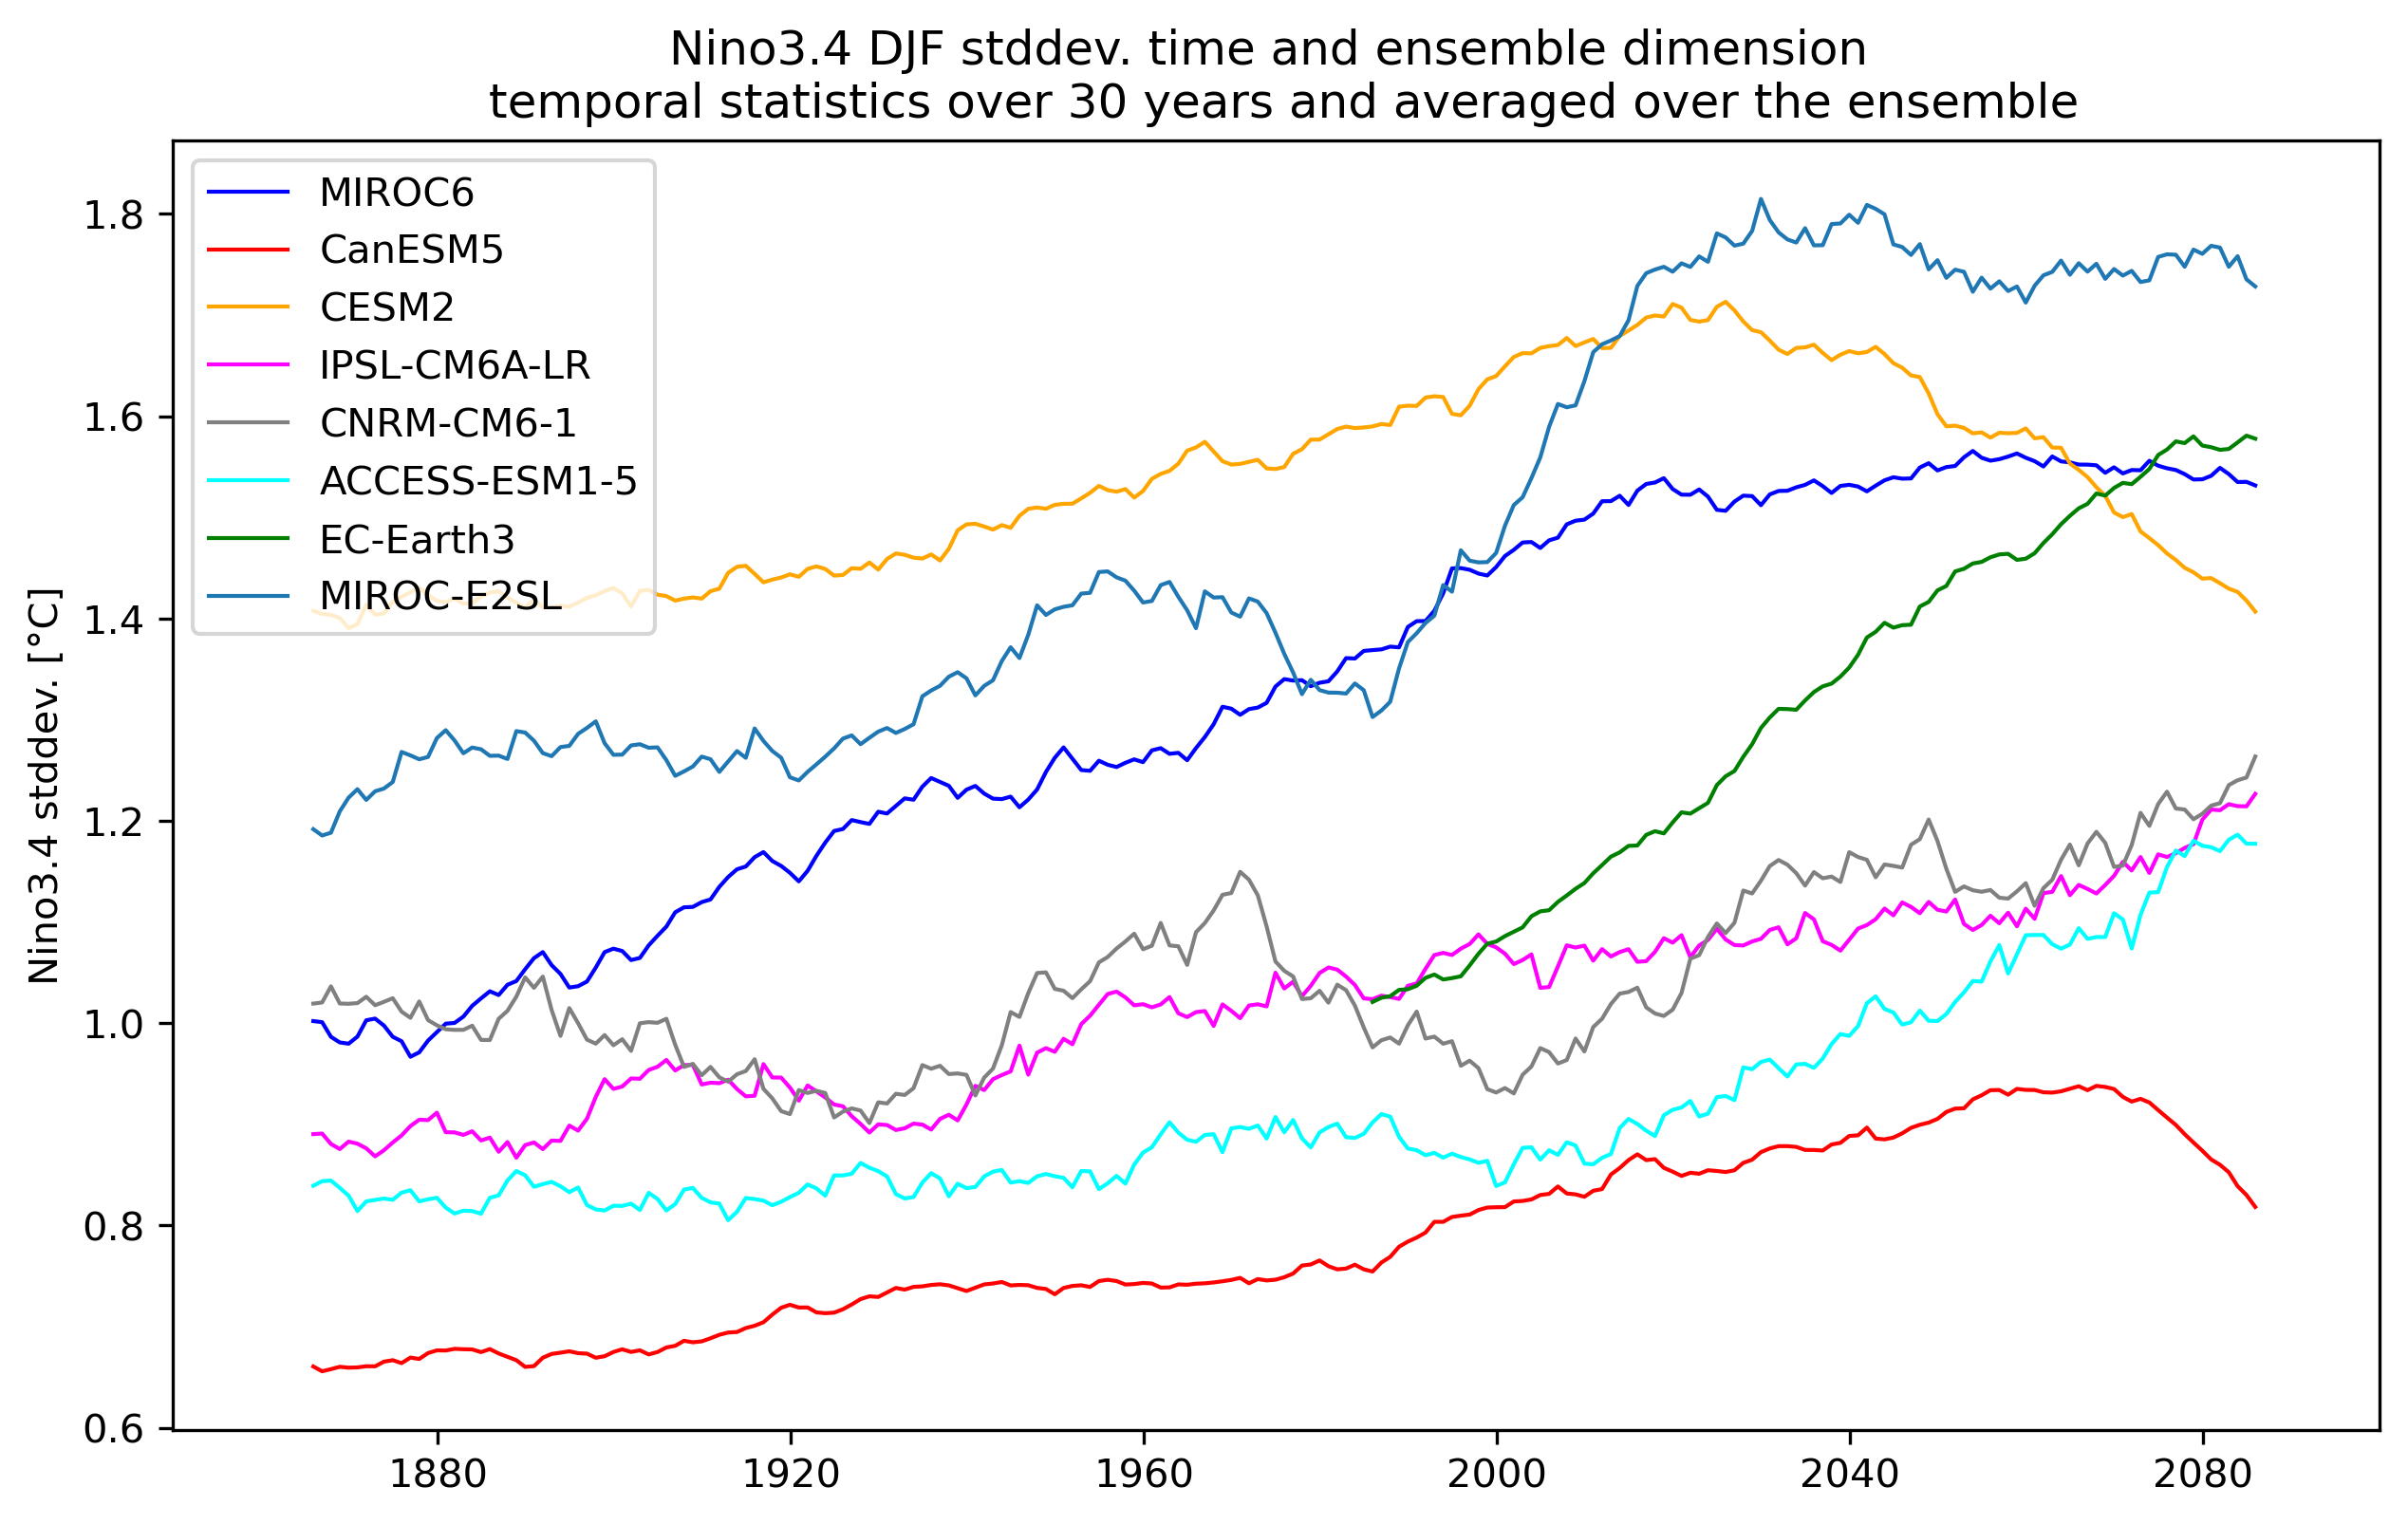

In [80]:
# time series
plt.figure(figsize=(10, 6), dpi=300)

plt.plot(miroc6_nino34_DJF_temp_std['time'].values,miroc6_nino34_DJF_temp_std,color='blue',linewidth=1,label='MIROC6');

plt.plot(canesm5_nino34_DJF_temp_std['time'].values,canesm5_nino34_DJF_temp_std,color='red',linewidth=1,label='CanESM5');

plt.plot(cesm2_nino34_DJF_temp_std['time'].values,cesm2_nino34_DJF_temp_std,color='orange',linewidth=1,label='CESM2');

plt.plot(ipsl_nino34_DJF_temp_std['time'].values,ipsl_nino34_DJF_temp_std,color='magenta',linewidth=1,label='IPSL-CM6A-LR');

plt.plot(cnrm_nino34_DJF_temp_std['time'].values,cnrm_nino34_DJF_temp_std,color='grey',linewidth=1,label='CNRM-CM6-1');

plt.plot(access_nino34_DJF_temp_std['time'].values,access_nino34_DJF_temp_std,color='cyan',linewidth=1,label='ACCESS-ESM1-5');

plt.plot(ecearth3_nino34_DJF_temp_std['time'].values,ecearth3_nino34_DJF_temp_std,color='green',linewidth=1,label='EC-Earth3');

plt.plot(miroc_e2sl_nino34_DJF_temp_std['time'].values,miroc_e2sl_nino34_DJF_temp_std,color='tab:blue',linewidth=1,label='MIROC-E2SL');


plt.legend()
plt.title('Nino3.4 DJF stddev. time and ensemble dimension \n temporal statistics over '+str(time_chunk)+' years and averaged over the ensemble')

plt.ylabel('Nino3.4 stddev. [°C]')
plt.xlim([pd.Timestamp('1850-01-01'),pd.Timestamp('2100-01-01')])
# plt.xlim([1850,2100])

plt.savefig(plotdir+'figure_1_option1.png', bbox_inches='tight', dpi=300)

## figure S1: comparing time and ensemble statistics

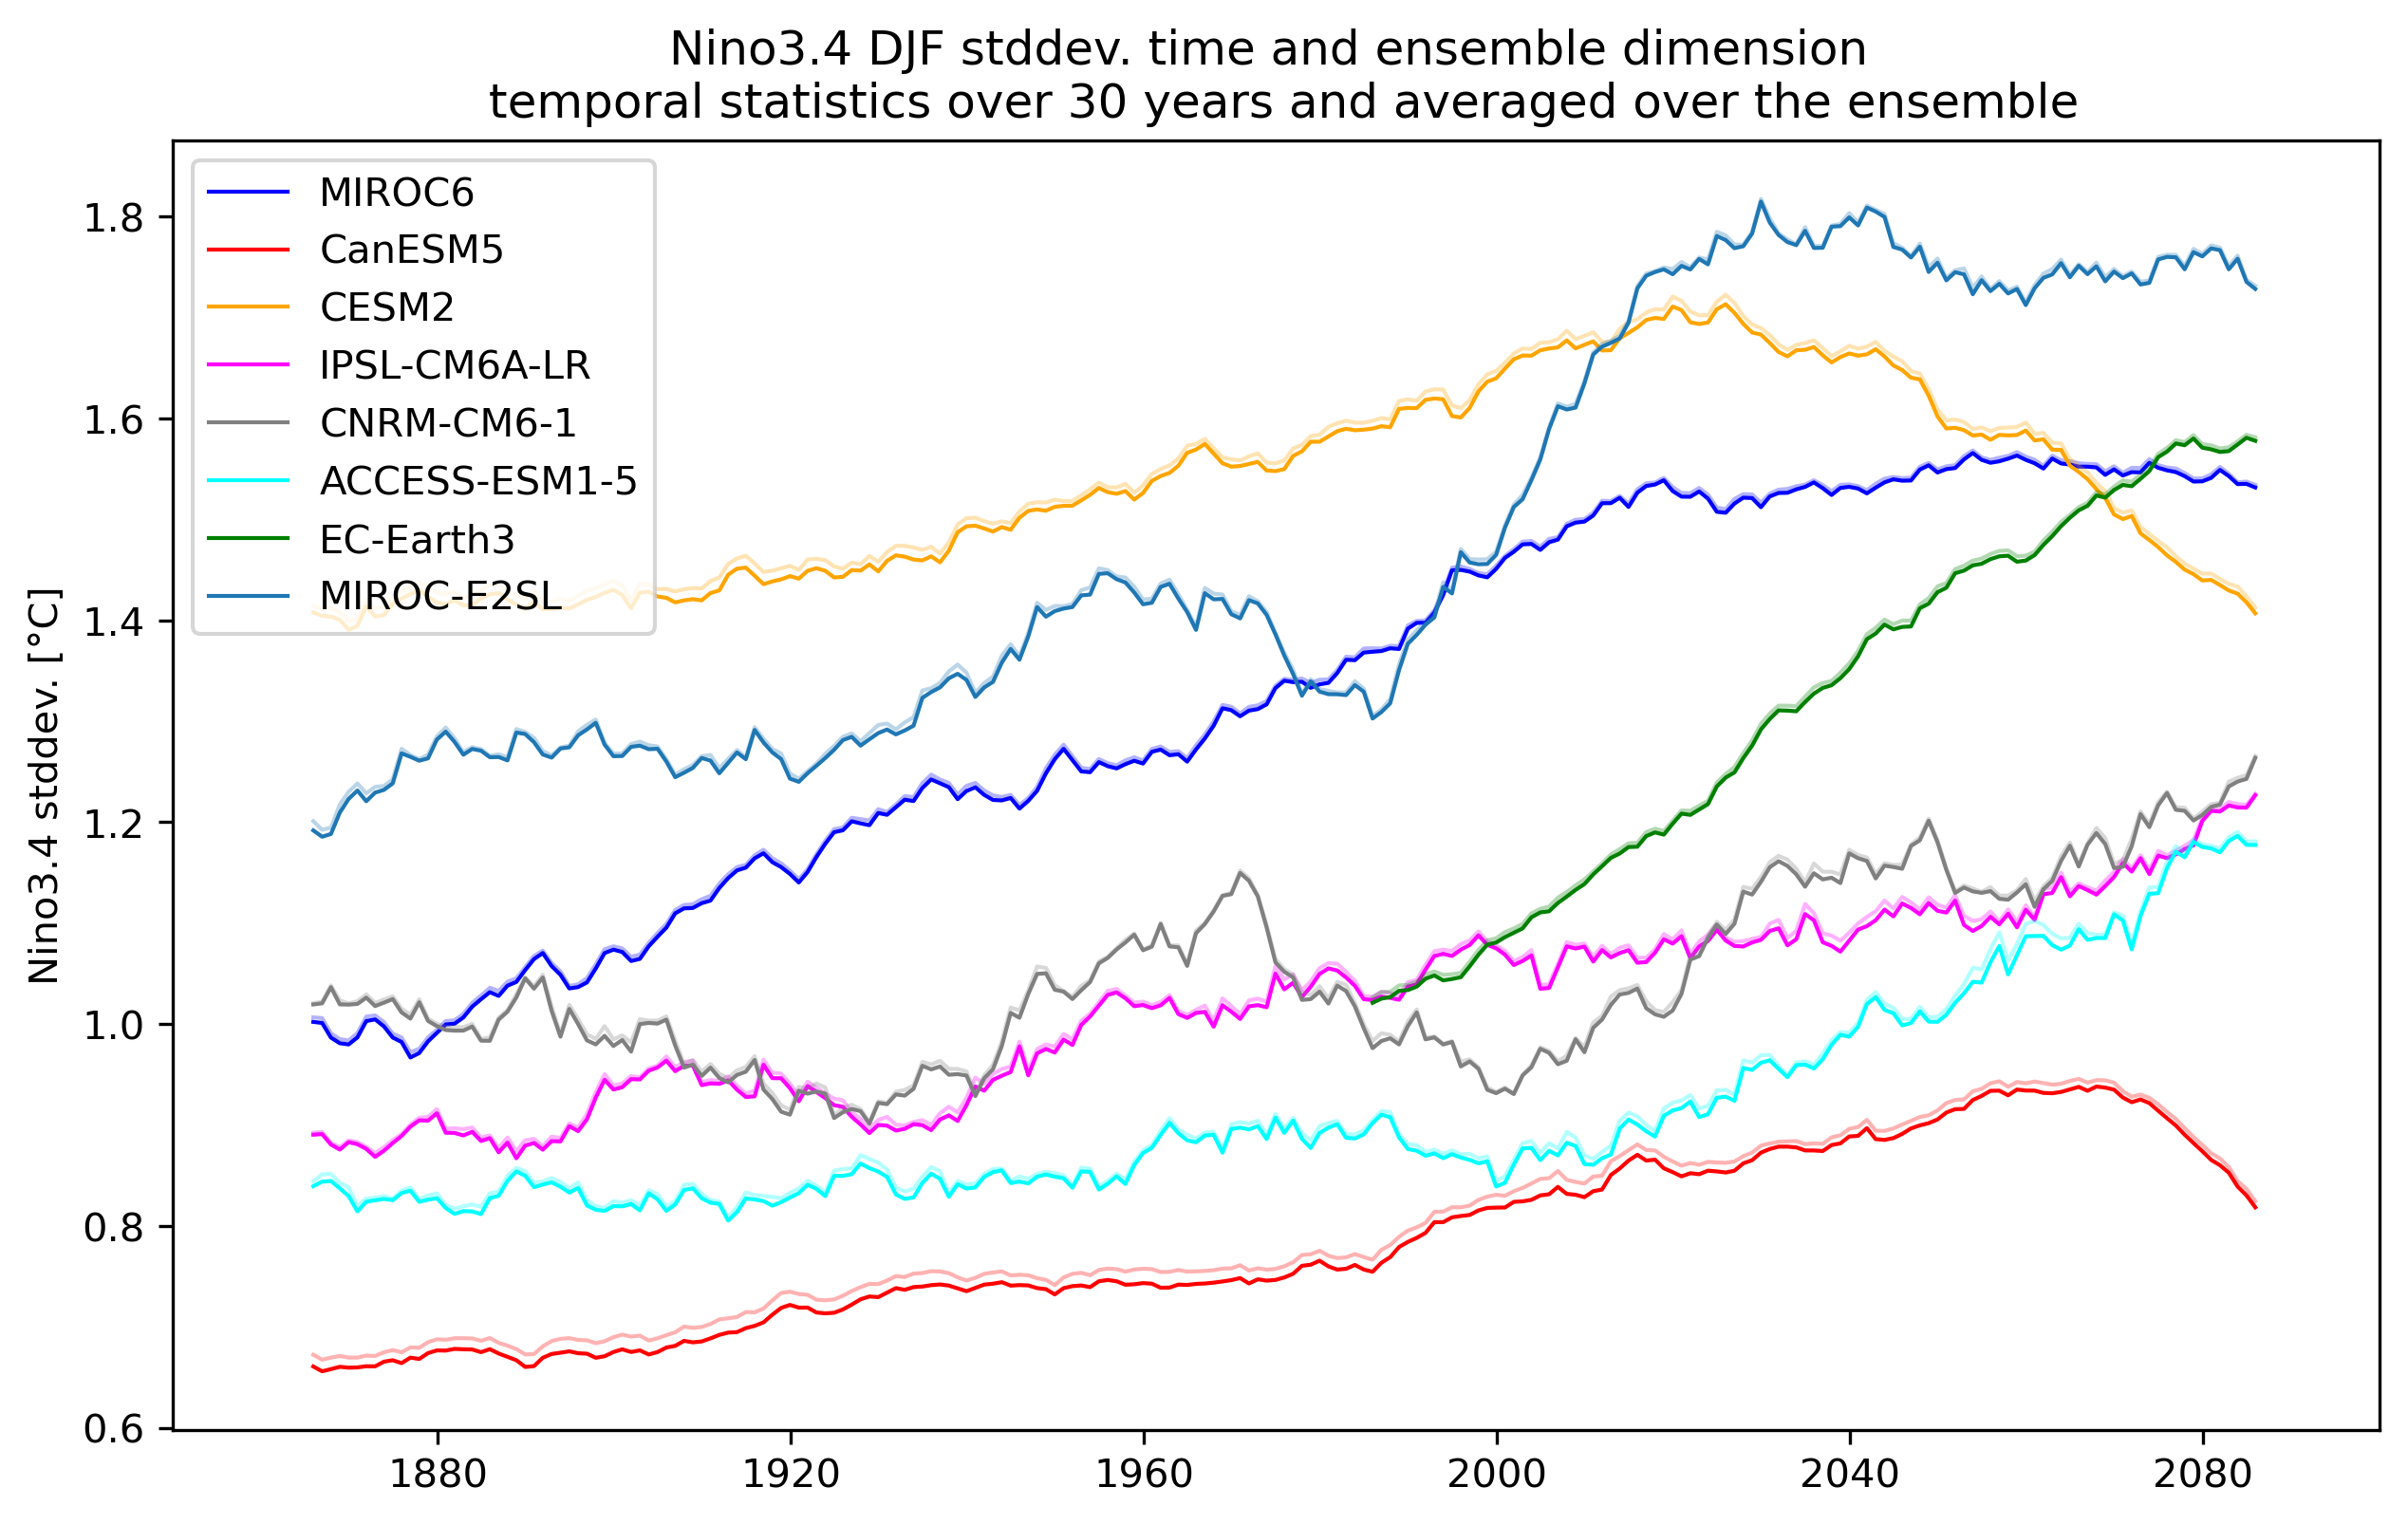

In [79]:
# time series
plt.figure(figsize=(10, 6), dpi=300)

plt.plot(miroc6_nino34_DJF_temp_std['time'].values,miroc6_nino34_DJF_temp_std,color='blue',linewidth=1,label='MIROC6');
plt.plot(miroc6_nino34_DJF_ens_std['time'].values,miroc6_nino34_DJF_ens_std,color='blue',linewidth=1,alpha=0.3,label='');

plt.plot(canesm5_nino34_DJF_temp_std['time'].values,canesm5_nino34_DJF_temp_std,color='red',linewidth=1,label='CanESM5');
plt.plot(canesm5_nino34_DJF_ens_std['time'].values,canesm5_nino34_DJF_ens_std,color='red',linewidth=1,alpha=0.3,label='');

plt.plot(cesm2_nino34_DJF_temp_std['time'].values,cesm2_nino34_DJF_temp_std,color='orange',linewidth=1,label='CESM2');
plt.plot(cesm2_nino34_DJF_ens_std['time'].values,cesm2_nino34_DJF_ens_std,color='orange',linewidth=1,alpha=0.3,label='');

plt.plot(ipsl_nino34_DJF_temp_std['time'].values,ipsl_nino34_DJF_temp_std,color='magenta',linewidth=1,label='IPSL-CM6A-LR');
plt.plot(ipsl_nino34_DJF_ens_std['time'].values,ipsl_nino34_DJF_ens_std,color='magenta',linewidth=1,alpha=0.3,label='');

plt.plot(cnrm_nino34_DJF_temp_std['time'].values,cnrm_nino34_DJF_temp_std,color='grey',linewidth=1,label='CNRM-CM6-1');
plt.plot(cnrm_nino34_DJF_ens_std['time'].values,cnrm_nino34_DJF_ens_std,color='grey',linewidth=1,alpha=0.3,label='');

plt.plot(access_nino34_DJF_temp_std['time'].values,access_nino34_DJF_temp_std,color='cyan',linewidth=1,label='ACCESS-ESM1-5');
plt.plot(access_nino34_DJF_ens_std['time'].values,access_nino34_DJF_ens_std,color='cyan',linewidth=1,alpha=0.3,label='');

plt.plot(ecearth3_nino34_DJF_temp_std['time'].values,ecearth3_nino34_DJF_temp_std,color='green',linewidth=1,label='EC-Earth3');
plt.plot(ecearth3_nino34_DJF_ens_std['time'].values,ecearth3_nino34_DJF_ens_std,color='green',linewidth=1,alpha=0.3,label='');

plt.plot(miroc_e2sl_nino34_DJF_temp_std['time'].values,miroc_e2sl_nino34_DJF_temp_std,color='tab:blue',linewidth=1,label='MIROC-E2SL');
plt.plot(miroc_e2sl_nino34_DJF_ens_std['time'].values,miroc_e2sl_nino34_DJF_ens_std,color='tab:blue',linewidth=1,alpha=0.3,label='');




plt.legend()
plt.title('Nino3.4 DJF stddev. time and ensemble dimension \n temporal statistics over '+str(time_chunk)+' years and averaged over the ensemble')

plt.ylabel('Nino3.4 stddev. [°C]')
plt.xlim([pd.Timestamp('1850-01-01'),pd.Timestamp('2100-01-01')])
# plt.xlim([1850,2100])

plt.savefig(plotdir+'figure_S1.png', bbox_inches='tight', dpi=300)